In [48]:
import pandas as pd     
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt

In [49]:
hps = pd.read_csv('./data_files/HP_final.csv')

In [92]:
hps.reset_index(inplace=True)
hps.drop(columns=['index'], inplace=True)

In [343]:
def get_df(team_1, team_2, map, all_hps):
    tusk = all_hps[(all_hps['Map'].str.lower() == map.lower() )]
    index_list = tusk.loc[(tusk['Team'].str.lower() == team_1.lower()) | (tusk['Team'].str.lower() == team_2.lower())].index


    match_lst = []
    for i in range(len(index_list)):
        index_list.sort_values(ascending=True) 
        if index_list[i]-1 == index_list[i-1]:
            match_lst.append(index_list[i])
            match_lst.append(index_list[i] -1) 
    
    test=all_hps.loc[match_lst].reset_index()
    test.drop(columns=['index'], inplace=True)

    repeat = len(test)/2
    if repeat >= 2.0:
        return test, repeat

    else:
        return test, 1
    


def hill_vals(test):
    cols = test.columns[2:-1]
    hills =[]
    for value in cols:
        hills.append(value)
        hills.append(value)
    return hills
    

def add_teams(test):
    teams=[]
    for col in test.columns[2:-1]:
       teams.append(test['Team'].unique()[0])
       teams.append(test['Team'].unique()[1])
    return teams

def get_scores(test):
    score= []

    for col in test.columns[2:-1]:
        score.append(test[col][test.index[0]])
        score.append(test[col][test.index[1]])

    return score


def make_main_df():
    data= pd.DataFrame(columns=['Team', 'Hills', 'Score'])

    return data

def add_to_df(data, teams, hills,score,map, x, team_1, team_2,):
    temp= pd.DataFrame(columns=['Team', 'Hills', 'Score'])


    temp['Team'] = teams
    temp['Hills'] = hills
    temp['Score'] = score
    temp['game'] = x
    temp['map'] = map



    team_1_totals = add_team_1_total(temp,team_1)
    team_2_totals = add_team_1_total(temp,team_2)
    temp = final_totals(temp, team_1_totals, team_2_totals, team_1, team_2)


    data = data.append(temp,ignore_index=True)
    return data
    


def add_team_1_total(temp, team_1):
    team_1_df = temp[temp['Team'].str.lower() == team_1.lower()].reset_index()
    total = int(team_1_df['Score'][0])
    team_1_df_totals = [int(team_1_df['Score'][0])]
    for x in team_1_df['Score'][1:]:
        total = total + int(x)
        team_1_df_totals.append(total)

    return team_1_df_totals

def add_team_2_total(temp, team_2):
    team_2_df = temp[temp['Team'].str.lower() == team_2.lower()].reset_index()
    total = int(team_2_df['Score'][0])
    
    team_2_df_totals = [int(team_2_df['Score'][0])]

    for x in team_2_df['Score'][1:]:
        total = total + int(x)
        team_2_df_totals.append(total)
    return team_2_df_totals


def final_totals(temp, team_1_totals, team_2_totals, team_1, team_2,):
    team_total = []
    if temp['Team'][0].lower() == team_1.lower():
        for x in range(len(team_2_totals)):
            team_total.append(team_1_totals[x])
            team_total.append(team_2_totals[x])

    if temp['Team'][1].lower() == team_1.lower():
        for x in range(len(team_2_totals)):
            team_total.append(team_2_totals[x])
            team_total.append(team_1_totals[x])

    temp['Total'] = team_total

    return temp





def make_plot(data, map, team_1, team_2):
    team_colors = {'faze':'Red' ,
    'rokkr': 'indigo', 
    'surge':'mediumturquoise', 
    'subliners':'gold', 
    'optic':'g', 
    'breach':'Lime', 
    'ultra':'m', 
    'thieves':'maroon',
    'mutineers': 'darkcyan',
    'guerrillas': 'blueviolet', 
    'legion':'Brown',
    'royal ravens': 'blue'}


    

    data_len = len(data['game'].unique())
    print(data_len)

    plt.style.use("seaborn-dark")
    for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
        plt.rcParams[param] = '#3f444d'  # bluish dark grey
    for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
        plt.rcParams[param] = '0.9'  # very light grey


    if (data_len/2) % 2 == 0:
        fig, axes = plt.subplots(int(data_len/2),int(data_len/2), figsize=(20,10))
        plt.suptitle(map[0].upper() + map[1:].lower() + ' Hardpoint Match '+ str(data['Team'][0])+ ' VS ' + str(data['Team'][1]),
        fontsize=30,color='black')


    elif data_len == 1.0:
        fig, axes = plt.subplots(int(data_len),int(data_len), figsize=(10,8))
        plt.suptitle(map[0].upper() + map[1:].lower() + ' Hardpoint Match '+ str(data['Team'][0])+ ' VS ' + str(data['Team'][1]),
        fontsize=30,color='black')

        
    else:
        fig, axes = plt.subplots(int(data_len),1, figsize=(9,10))
        plt.suptitle(map[0].upper() + map[1:].lower() + ' Hardpoint Match '+ str(data['Team'][0])+ ' VS ' + str(data['Team'][1]),
        fontsize=30,color='black')


    try: 
        for game, ax in zip(data['game'].unique(), axes.ravel()):
            plot_data = data[data['game'] == game]

            plot_data_team_0 = plot_data[plot_data['Team'].str.lower() ==  team_1.lower()]
            plot_data_team_1 = plot_data[plot_data['Team'].str.lower() ==  team_2.lower()]



            sns.lineplot(x=plot_data_team_0['Hills'],y=plot_data_team_0['Total'],label=str(team_1),
            color=team_colors[str(team_1.lower())], linewidth = 3, ax=ax)


            sns.lineplot(x=plot_data_team_1['Hills'],y=plot_data_team_1['Total'],label=str(team_2),
            color=team_colors[str(team_2.lower())], linewidth = 3, ax=ax)
            # # chart formatting
            ax.set_ylim(0,250)
            ax.grid(axis='y',color='black')
            ax.set_xlabel('Hills',color='black', fontsize=13)
            ax.set_ylabel('Points', color='black',fontsize=13)
            ax.legend().set_visible(False)
            ax.tick_params(axis='x', colors='black') 
            ax.tick_params(axis='y', colors='black')

            for line, name in zip(ax.lines,[int(plot_data_team_0.iloc[-1,-1]),int(plot_data_team_1.iloc[-1,-1])]):
                y = line.get_ydata()[-1]

                ax.annotate(name, xy=(1,y), xytext=(-32,2), color='black', 
                            xycoords = ax.get_yaxis_transform(), textcoords="offset points", weight='bold',
                            size=20, va="center")

                            
                ax.annotate(name, xy=(1,y), xytext=(-30,2), color=line.get_color(), 
                            xycoords = ax.get_yaxis_transform(), textcoords="offset points", weight='bold',
                            size=19.5, va="center")


            for line, name in zip(ax.lines, [team_1,team_2]):
                y = line.get_ydata()[-1]

                ax.annotate(f': {name}', xy=(1,y), xytext=(5,2), color='black', 
                            xycoords = ax.get_yaxis_transform(), textcoords="offset points", weight='bold',
                            size=20, va="center")

                            
                ax.annotate(f': {name}', xy=(1,y), xytext=(5,2), color=line.get_color(), 
                            xycoords = ax.get_yaxis_transform(), textcoords="offset points", weight='bold',
                            size=19.5, va="center")

    except:
        plot_data = data[data['game'] == 0]

        plot_data_team_0 = plot_data[plot_data['Team'].str.lower() ==  team_1.lower()]
        plot_data_team_1 = plot_data[plot_data['Team'].str.lower() ==  team_2.lower()]



        sns.lineplot(x=plot_data_team_0['Hills'],y=plot_data_team_0['Total'],label=str(team_1),
        color=team_colors[str(team_1.lower())], linewidth = 3, ax=axes)

        sns.lineplot(x=plot_data_team_1['Hills'],y=plot_data_team_1['Total'],label=str(team_2),
        color=team_colors[str(team_2.lower())], linewidth = 3, ax=axes)
        # # chart formatting
        axes.set_ylim(0,250)
        axes.grid(axis='y',color='black')
        axes.set_xlabel('Hills',color='black', fontsize=13)
        axes.set_ylabel('Points', color='black',fontsize=13)
        axes.legend().set_visible(False)
        axes.tick_params(axis='x', colors='black') 
        axes.tick_params(axis='y', colors='black')

        for line, name in zip(axes.lines,[int(plot_data_team_0.iloc[-1,-1]),int(plot_data_team_1.iloc[-1,-1])]):
            y = line.get_ydata()[-1]

            axes.annotate(name, xy=(1,y), xytext=(-32,2), color='black', 
                        xycoords = axes.get_yaxis_transform(), textcoords="offset points", weight='bold',
                        size=20, va="center")

                        
            axes.annotate(name, xy=(1,y), xytext=(-30,2), color=line.get_color(), 
                        xycoords = axes.get_yaxis_transform(), textcoords="offset points", weight='bold',
                        size=19.5, va="center")


        for line, name in zip(axes.lines, [team_1,team_2]):
            y = line.get_ydata()[-1]

            axes.annotate(f': {name}', xy=(1,y), xytext=(5,2), color='black', 
                        xycoords = axes.get_yaxis_transform(), textcoords="offset points", weight='bold',
                        size=20, va="center")

                        
            axes.annotate(f': {name}', xy=(1,y), xytext=(5,2), color=line.get_color(), 
                        xycoords = axes.get_yaxis_transform(), textcoords="offset points", weight='bold',
                        size=19.5, va="center")            






    return plt.show()

In [344]:
def HardPoint(team_1, team_2, map, week1):
    #try:
    test, repeat=get_df(team_1, team_2, map, week1) 
    data= make_main_df()
    for x in range(int(repeat)):
        y = int(x*2)
        new_df = test.loc[[y,y+1]]
        new_df.dropna(axis=1,inplace=True)
        hills = hill_vals(new_df)
        teams = add_teams(new_df)
        score = get_scores(new_df)
        data = add_to_df(data, teams, hills,score,map, x, team_1, team_2)

    plot = make_plot(data, map, team_1, team_2)

    return plot
    # except:
    #     print('They have not played eachother on this map')
    


3


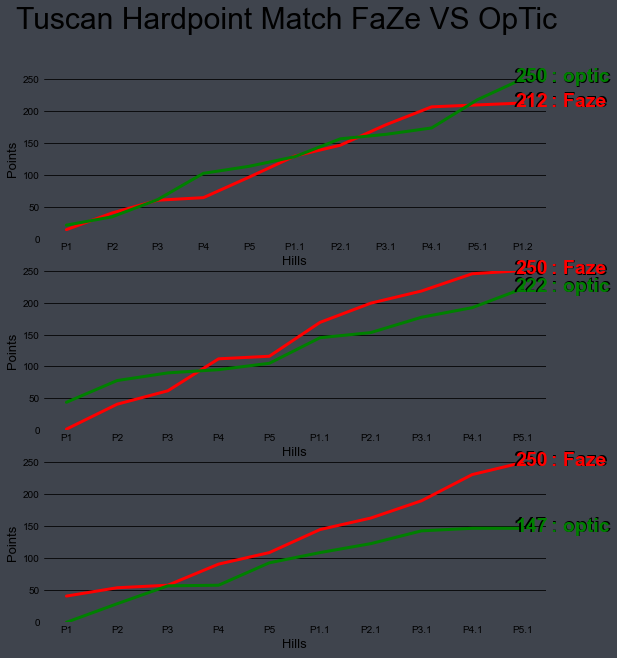

In [359]:
data = HardPoint('Faze', 'optic', 'tuscan', hps)
data